In [1]:
# importing lib's
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading titanic csv file
titanic=pd.read_csv('titanic.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# checking rows and columns
titanic.shape

(891, 12)

we have 891 rows and 12 columns

In [4]:
# explore some insight of data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


age column is showing sum missing values

In [5]:
# making dataframe having total no. of missing values, percentage of missing values and datatypes
total_missing_data=titanic.isnull().sum().sort_values(ascending=False)
percentage_missing_data=round(titanic.isnull().sum()/titanic.isnull().count()*100,1).sort_values(ascending=False)
dtype=titanic.dtypes.sort_values(ascending=False)
missing_data=pd.concat([total_missing_data,percentage_missing_data,dtype],keys=['Missing Values','Missing Values in %','Data Types'],axis=1)
missing_data

,Missing Values,Missing Values in %,Data Types
Cabin,687,77.1,object
Age,177,19.9,float64
Embarked,2,0.2,object
PassengerId,0,0.0,int64
Survived,0,0.0,int64
Pclass,0,0.0,int64
Name,0,0.0,object
Sex,0,0.0,object
SibSp,0,0.0,int64
Parch,0,0.0,int64


cabin,age, and embarked columns have missing values. cabin has highest percentage of missing values

In [6]:
# dropping unnecessary columns 
titanic=titanic.drop(['Cabin','Ticket','Name','PassengerId'],axis=1)
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [7]:
# checking embarked description
titanic.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

### filling nan values

In [8]:
# replacing nan value with most frequent
titanic['Embarked']=titanic['Embarked'].fillna('S')

filling embarked nan values with most frequent class

In [9]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
# replacing male and female with 0 and 1
titanic['Sex']=titanic['Sex'].replace({'male':0,'female':1})

In [11]:
# categorical into numeric form
titanic['Embarked']=titanic['Embarked'].replace({'S':0,'C':1,'Q':2})

In [12]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


<AxesSubplot:ylabel='Frequency'>

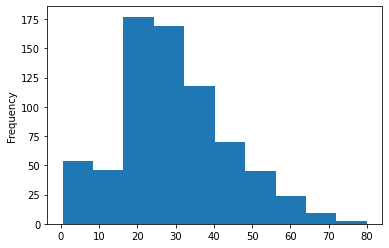

In [13]:
titanic['Age'].plot(kind='hist')

age with 20 to 35 have highest number of passengers

In [14]:
# filling age nan values
for i in [titanic]:
    mean = titanic["Age"].mean()
    std = titanic["Age"].std()
    null = i["Age"].isnull().sum()
    rand_age = np.random.randint(mean-std,mean+std,size=null)
    age_slice = i["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    i["Age"] = age_slice
    i["Age"] = titanic["Age"].astype(int)

In [15]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,0
1,1,1,1,38,1,0,71.2833,1
2,1,3,1,26,0,0,7.9250,0
3,1,1,1,35,1,0,53.1000,0
4,0,3,0,35,0,0,8.0500,0


In [16]:
titanic.Age.dtype

dtype('int32')

In [17]:
titanic.Age=titanic['Age'].astype('int64')

coverted age dtype int32 to int64

In [18]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,0
1,1,1,1,38,1,0,71.2833,1
2,1,3,1,26,0,0,7.9250,0
3,1,1,1,35,1,0,53.1000,0
4,0,3,0,35,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,0
887,1,1,1,19,0,0,30.0000,0
888,0,3,1,38,1,2,23.4500,0
889,1,1,0,26,0,0,30.0000,1


In [19]:
age_ = []
for i in titanic['Age']:
    if i >= 0 and i < 11:
        age_.append('0')
    elif i >= 11 and i < 18:
        age_.append('1')
    elif i >= 18 and i < 22:
        age_.append('2')
    elif i >= 22 and i < 27:
        age_.append('3')
    elif i >= 27 and i < 33:
        age_.append('4')
    elif i >= 33 and i < 40:
        age_.append('5')
    elif i >= 40:
        age_.append('6')
titanic['age_'] = age_
titanic['age_'] = titanic['age_'].astype('int64')

In [20]:
fare_ = []
for i in titanic['Fare']:
    if i >= 0 and i < 7.9999:
        fare_.append('0')
    elif i >= 7.9999 and i < 14.9999:
        fare_.append('1')
    elif i >= 14.9999 and i < 30.9999:
        fare_.append('2')
    elif i >= 30.9999 and i < 50.9999:
        fare_.append('3')
    elif i >= 50.9999 and i < 100.9999:
        fare_.append('4')
    elif i >= 100.9999 and i < 200.9999:
        fare_.append('5')
    elif i >= 200.9999:
        fare_.append('6')
titanic['fare_'] = fare_
titanic['fare_'] = titanic['fare_'].astype('int64')

In [21]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_,fare_
0,0,3,0,22,1,0,7.2500,0,3,0
1,1,1,1,38,1,0,71.2833,1,5,4
2,1,3,1,26,0,0,7.9250,0,3,0
3,1,1,1,35,1,0,53.1000,0,5,4
4,0,3,0,35,0,0,8.0500,0,5,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,0,4,1
887,1,1,1,19,0,0,30.0000,0,2,2
888,0,3,1,38,1,2,23.4500,0,5,2
889,1,1,0,26,0,0,30.0000,1,3,2


In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   age_      891 non-null    int64  
 9   fare_     891 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 69.7 KB


In [23]:
print('','\nC = Cherbourg','\nQ = Queenstown','\nS = Southampton\n')

print("S relates '0'=",titanic.Embarked.value_counts()[0])
print("C relates '1'=",titanic.Embarked.value_counts()[1])
print("Q relates '2'=",titanic.Embarked.value_counts()[2])

 
C = Cherbourg 
Q = Queenstown 
S = Southampton

S relates '0'= 646
C relates '1'= 168
Q relates '2'= 77


In [24]:
print("No. of Male '0'=",titanic.Sex.value_counts()[0])
print("No. of Female '1'=",titanic.Sex.value_counts()[1])

No. of Male '0'= 577
No. of Female '1'= 314


In [25]:
print("No. of passengers in 1st class '1'=",titanic.Pclass.value_counts()[1])
print("No. of passengers in 2nd class '2'=",titanic.Pclass.value_counts()[2])
print("No. of passengers in 3rd class '3'=",titanic.Pclass.value_counts()[3])

No. of passengers in 1st class '1'= 216
No. of passengers in 2nd class '2'= 184
No. of passengers in 3rd class '3'= 491


In [26]:
print('Outcome of Survival in \n0=not survival  \n1=survival')
print('\nnot survival=',titanic.Survived.value_counts()[0])
print('survival=',titanic.Survived.value_counts()[1])

Outcome of Survival in 
0=not survival  
1=survival

not survival= 549
survival= 342


In [27]:
titanic.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

survival rate of class 1 passengers are highest

In [28]:
titanic.groupby('Sex').Survived.mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

survival rate of females are more than males

<AxesSubplot:xlabel='Survived', ylabel='count'>

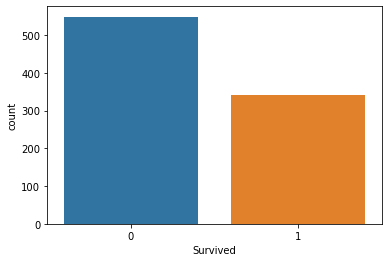

In [29]:
sns.countplot(titanic['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='Age'>

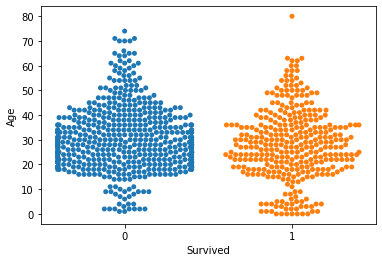

In [30]:
sns.swarmplot(x="Survived",y="Age",data=titanic)

females in all age group mostly survived but in males most survived  rage between 20 to 40 

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

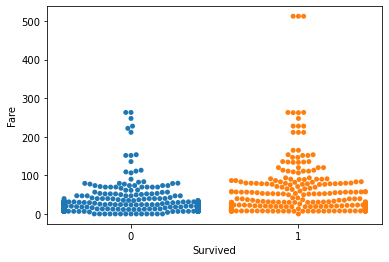

In [31]:
sns.swarmplot(x='Survived',y='Fare',data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

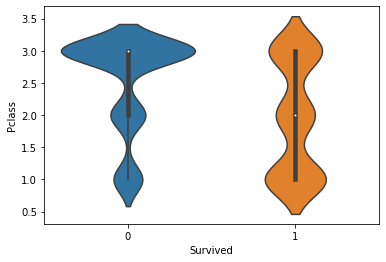

In [32]:
sns.violinplot(x='Survived',y='Pclass',data=titanic)

class 3 has highest dead rate in  male category

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

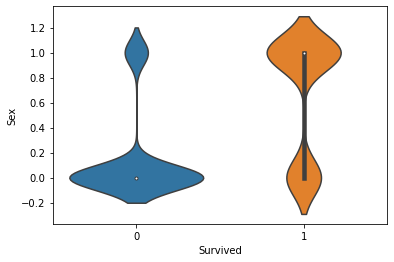

In [33]:
sns.violinplot(x="Survived",y='Sex',data=titanic)

male death rate is highest

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

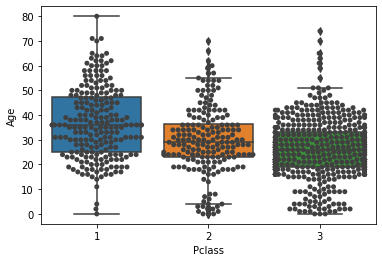

In [34]:
sns.boxplot(x="Pclass", y="Age", data=titanic)
sns.swarmplot(x="Pclass", y="Age", data=titanic, color=".25")

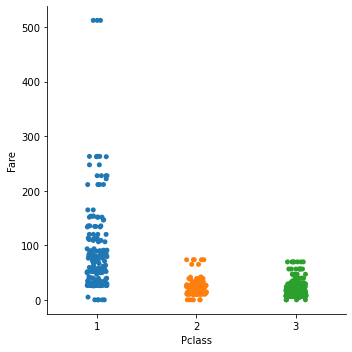

In [35]:
sns.catplot(x="Pclass", y="Fare", data=titanic)

catplot is showing class 1 having slightly higher fare compare to class 2 and class 3

<AxesSubplot:>

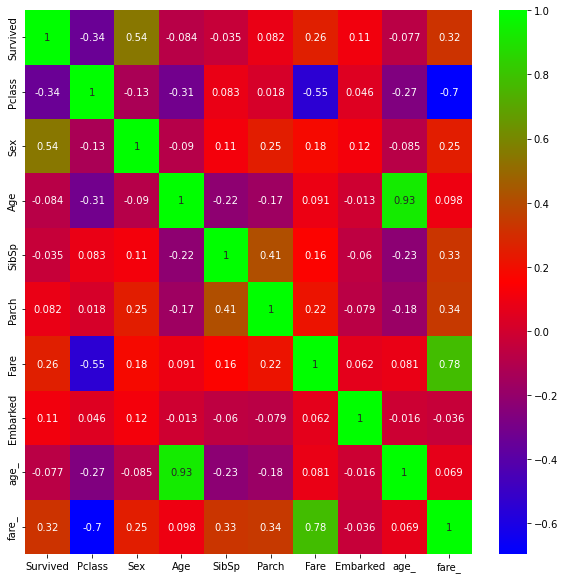

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(titanic.corr(),annot=True,cmap='brg')

survived column is showing higher relation with parch

<AxesSubplot:xlabel='Fare', ylabel='Age'>

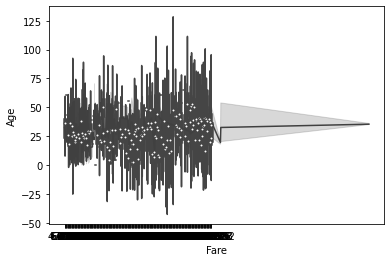

In [37]:
sns.violinplot(x="Fare", y="Age", data=titanic)
sns.lineplot(x="Fare", y="Age", data=titanic, color=".25")

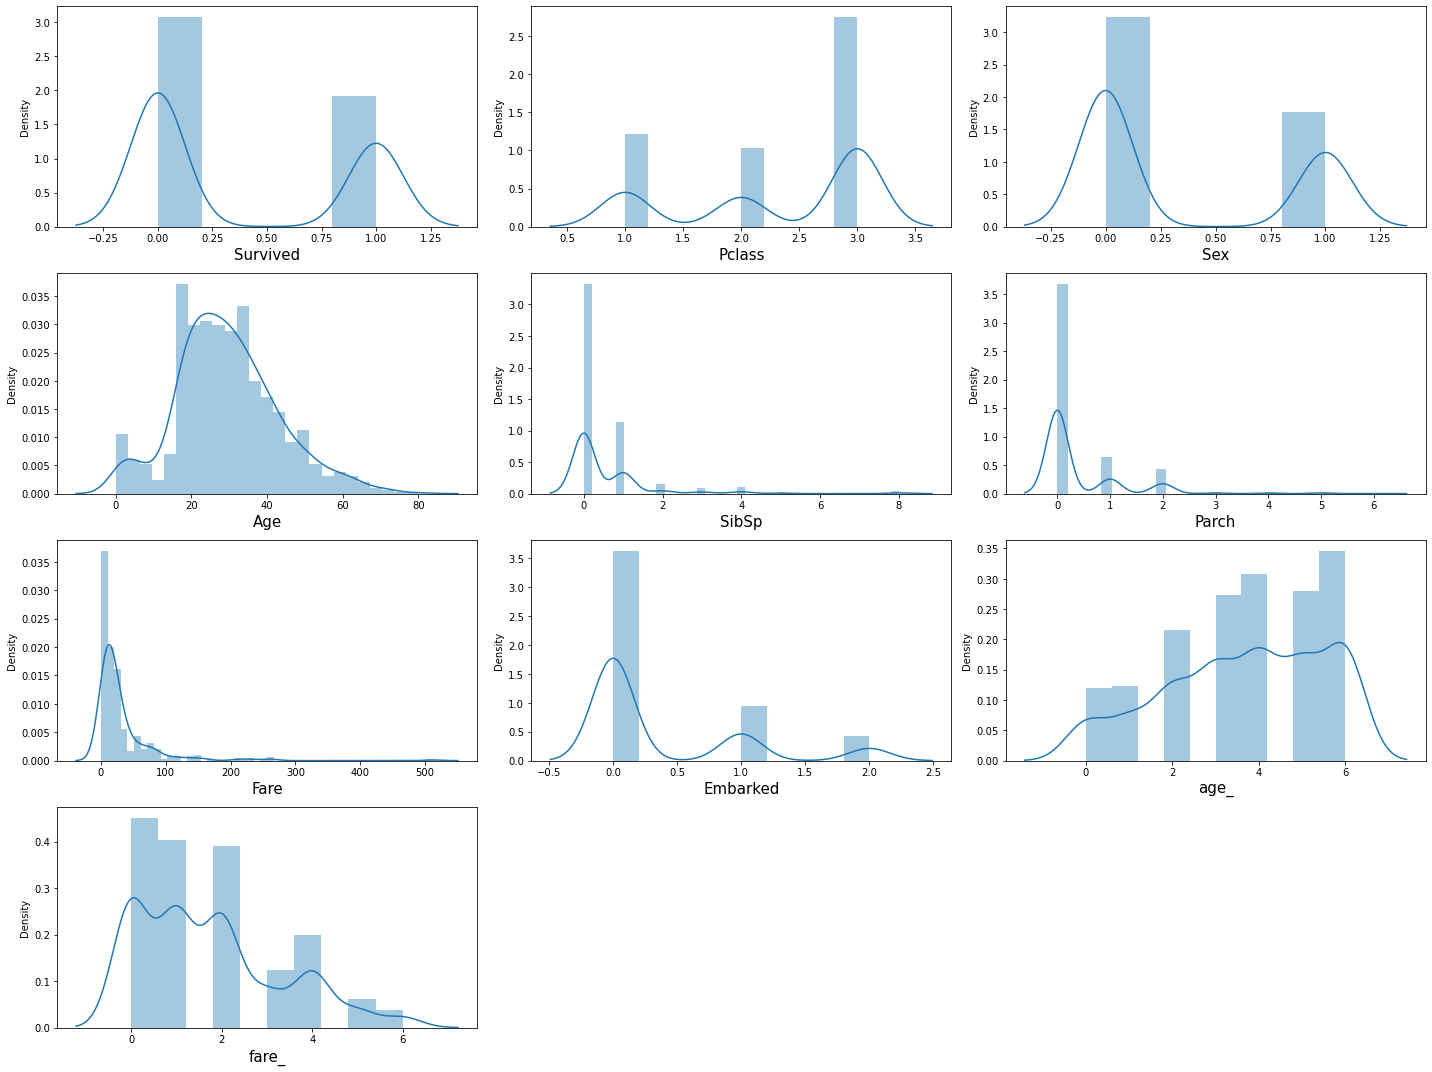

In [38]:
# univariate analysis
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for i in titanic:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(titanic[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

data is not normaly distributes.Fare column has outliers.

others columns contain categorical values. 

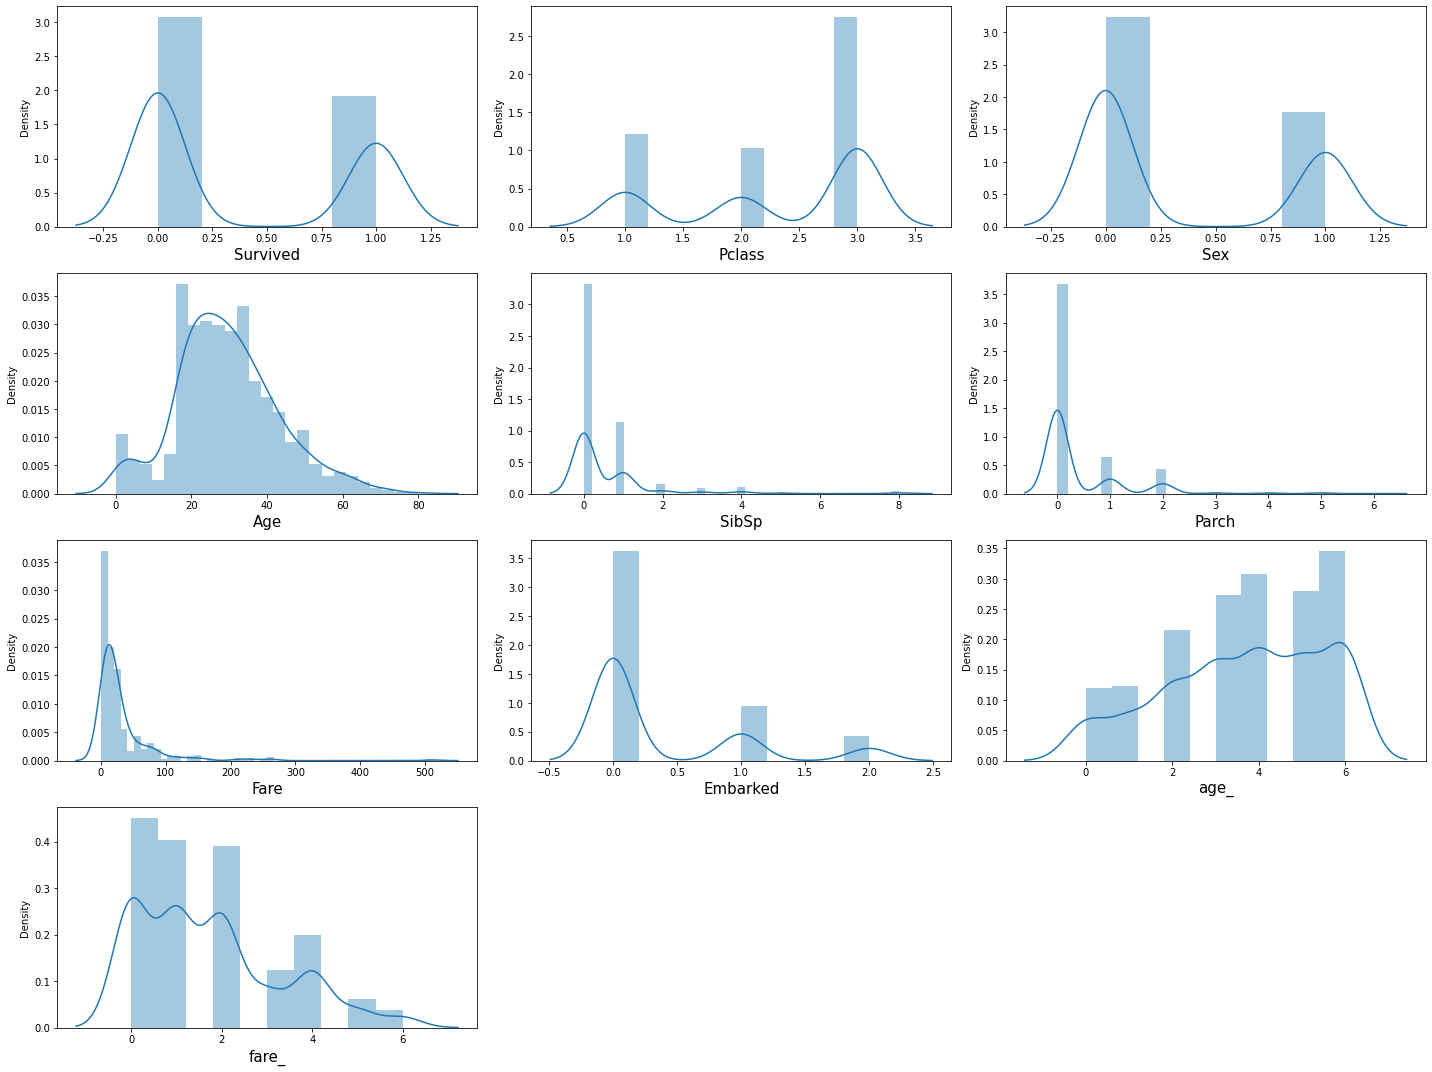

In [39]:
# univariate analysis
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for i in titanic:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(titanic[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

fare column look okay

In [40]:
# shape after removing outliers
titanic.shape

(891, 10)

871 rows and 8 columns

In [41]:
# splitting data
x=titanic.drop(['Survived','Age','Fare'],axis=1)
y=titanic.Survived

In [45]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over=sm.fit_resample(x,y)
y_over.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [46]:
x_over

,Pclass,Sex,SibSp,Parch,Embarked,age_,fare_
0,3,0,1,0,0,3,0
1,1,1,1,0,1,5,4
2,3,1,0,0,0,3,0
3,1,1,1,0,0,5,4
4,3,0,0,0,0,5,1
...,...,...,...,...,...,...,...
1093,3,0,0,0,0,2,0
1094,1,1,0,0,0,6,5
1095,2,1,0,2,0,0,2
1096,1,0,0,2,0,0,4


In [47]:
x_over=pd.DataFrame(x_over,columns=x_over.columns)
y_over=pd.DataFrame(y_over,columns=['Survived'])

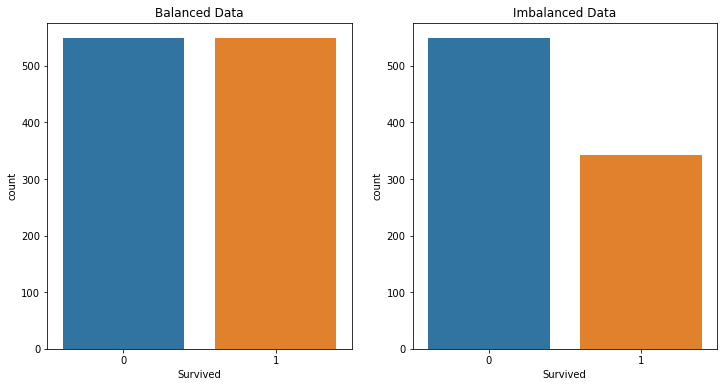

In [48]:
fig=plt.figure(figsize=(12,6))

plt.subplot(121)
plt.title('Balanced Data')
sns.countplot(data=y_over,x='Survived')

plt.subplot(122)
plt.title('Imbalanced Data')
sns.countplot(x='Survived',data=titanic)
plt.show()

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(x_over)
xo= scaler.transform(x_over)

In [57]:
xo

array([[1.        , 0.        , 0.125     , ..., 0.        , 0.5       ,
        0.        ],
       [0.        , 1.        , 0.125     , ..., 0.5       , 0.83333333,
        0.66666667],
       [1.        , 1.        , 0.        , ..., 0.        , 0.5       ,
        0.        ],
       ...,
       [0.5       , 1.        , 0.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.5       , 1.        , 0.        , ..., 0.        , 0.83333333,
        0.16666667]])

### model applying

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score # model selection

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve # metrics


In [59]:
# finding best random state
maxacc=0
maxrs=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(xo,y_over,test_size=.25,random_state=i) 
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc= accuracy_score(y_test,pred)
    if acc>maxacc:
        maxrs=i
print('\nmax random state:',maxrs)


max random state: 299


In [60]:
 x_train,x_test,y_train,y_test=train_test_split(xo,y_over,test_size=.25,random_state=maxrs) 

In [61]:
# LogisticRegression model  
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('--------------------------LogisticRegression------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

# decisiontree classifier model  
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('--------------------------Decision Tree Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

# KNeighbors Classifier model
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
print('--------------------------KNeighbors Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

# Support Vector Classifier model
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('--------------------------Support Vector Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

# RandomForest Classifier model
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('--------------------------RandomForest Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

# AdaBoost Classifier model
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
print('--------------------------AdaBoost Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------LogisticRegression------------------

accuracy score:77.82%

classification report:

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       136
           1       0.80      0.76      0.77       139

    accuracy                           0.78       275
   macro avg       0.78      0.78      0.78       275
weighted avg       0.78      0.78      0.78       275

confusioon matrix:

[[109  27]
 [ 34 105]]
--------------------------Decision Tree Classifier------------------

accuracy score:78.91%

classification report:

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       136
           1       0.81      0.76      0.78       139

    accuracy                           0.79       275
   macro avg       0.79      0.79      0.79       275
weighted avg       0.79      0.79      0.79       275

confusioon matrix:

[[112  24]
 [ 34 105]]
--------------------------KNeigh

### cross validation

In [62]:
# try to improve accuracy through cross validation  
m=[lr,dtc,knc,svc,rfc,abc] 
for i in m:
    scr_=cross_val_score(i,xo,y_over,cv=5)
    print('----------',i,'------------')
    print(f'cross validation score:{scr_.mean()*100:.2f}')

---------- LogisticRegression() ------------
cross validation score:77.42
---------- DecisionTreeClassifier() ------------
cross validation score:81.70
---------- KNeighborsClassifier() ------------
cross validation score:81.61
---------- SVC() ------------
cross validation score:79.06
---------- RandomForestClassifier() ------------
cross validation score:82.33
---------- AdaBoostClassifier() ------------
cross validation score:79.33


### auc roc plot

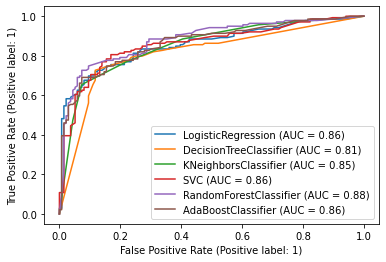

In [63]:
# comparing models
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_) # ax_ = axes with confusion matrix , use to combine one model to others
plot_roc_curve(knc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(abc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right') 
plt.show()

auc roc plot shows svc have maximum area under the curve

### hyperparameter tuning

In [64]:
# RFC model has the least difference   
# hyperparameter tuning for rfc
parameters={'n_estimators':[7,10,13,15],
    'criterion':['entropy','gini'],
    'max_depth':[6,7,10],
    'min_samples_split':[6,7,10,11],
    'min_samples_leaf':[5,6,7,10]}

gs=GridSearchCV(rfc,parameters)
gs.fit(x_train,y_train)
print('\n--------------------------RandomForest Classifier Hyperparameter Tuning------------------')
print('best estimators:\n',gs.best_estimator_)

rfc_=gs.best_estimator_ # direct applying best estimators
rfc_.fit(x_train,y_train)
pred=rfc_.predict(x_test)
print(f'\n\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'\nconfusion_matrix:\n{confusion_matrix(y_test,pred)}\n')
print(f'\nclassification_report:\n{pd.DataFrame(classification_report(y_test,pred,output_dict=True))}')


--------------------------RandomForest Classifier Hyperparameter Tuning------------------
best estimators:
 RandomForestClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=13)


accuracy score:80.36%


confusion_matrix:
[[117  19]
 [ 35 104]]


classification_report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.769737    0.845528  0.803636    0.807633      0.808046
recall       0.860294    0.748201  0.803636    0.804248      0.803636
f1-score     0.812500    0.793893  0.803636    0.803197      0.803095
support    136.000000  139.000000  0.803636  275.000000    275.000000


### saving model

In [65]:
# saving best model
import pickle
filename='titanic_new.pkl'
pickle.dump(rfc_,open(filename,'wb'))